# LeNet-5: MNIST & TensorFlow-2.8

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import AveragePooling2D, Conv2D, Flatten, Dense
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, Model

In [2]:
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.8.0


In [3]:
# Check GPU availibility-
gpu_devices = tf.config.list_physical_devices('GPU')
# print(f"GPU: {gpu_devices}")

if gpu_devices:
    print(f"GPU: {gpu_devices}")
    details = tf.config.experimental.get_device_details(gpu_devices[0])
    print(f"GPU details: {details.get('device_name', 'Unknown GPU')}")
else:
    print("No GPU found")

No GPU found


#### NOTE:
Please note that in the original paper "Gradient-Based Learning Applied to Document Recognition"
by Yann LeCun et al, the original image size was of 32x32 pixels.
However, in the TensorFlow MNIST dataset, the images are of 28x28 pixels.

Also, in the original paper, hyperbolic tangent (tanh) activation functions were used in the hidden
layers, however, in the code below, ReLU activation functions are used in the hidden layers.

### MNIST Data preprocessing:

In [4]:
# Load and prepare the MNIST dataset-
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
# Normalize and convert samples from integers to floating-point numbers-
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = tf.cast(X_train, dtype=tf.float32)
X_test = tf.cast(X_test, dtype=tf.float32)

In [6]:
# Perform one-hot encoding for targets-
n_classes = 10

y_train_ohe = tf.keras.utils.to_categorical(y_train, n_classes)
y_test_ohe = tf.keras.utils.to_categorical(y_test, n_classes)

In [7]:
X_train = tf.reshape(X_train, shape=(X_train.shape[0], 28, 28, 1))
X_test = tf.reshape(X_test, shape = (X_test.shape[0], 28, 28, 1))

In [8]:
print("\nX_train.shape = {0} & y_train_ohe.shape = {1}".format(X_train.shape, y_train_ohe.shape))
print("X_test.shape = {0} & y_test_ohe.shape = {1}\n".format(X_test.shape, y_test_ohe.shape))


X_train.shape = (60000, 28, 28, 1) & y_train_ohe.shape = (60000, 10)
X_test.shape = (10000, 28, 28, 1) & y_test_ohe.shape = (10000, 10)



## Training LeNet-5 CNN for MNIST classification:

In [17]:
class LeNet5(Model):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = Conv2D(
            filters = 6, kernel_size = (5, 5),
            strides = (1, 1), activation = None,
            input_shape = (28, 28, 1)
        )
        self.pool1 = AveragePooling2D(
            pool_size = (2, 2), strides = (2, 2)
        )
        self.conv2 = Conv2D(
            filters = 16, kernel_size = (5, 5),
            strides = (1, 1), activation = None
        )
        self.pool2 = AveragePooling2D(
            pool_size = (2, 2), strides = (2, 2)
        )
        self.flatten = Flatten()
        self.dense1 = Dense(
            units = 120, activation = None
        )
        self.dense2 = Dense(
            units = 84, activation = None
        )
        self.output_layer = Dense(
            units = 10, activation = None
        )
    
    
    def call(self, x):
        x = tf.nn.relu(self.conv1(x))
        x = self.pool1(x)
        x = tf.nn.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = tf.nn.relu(self.dense1(x))
        x = tf.nn.relu(self.dense2(x))
        x = tf.nn.softmax(self.output_layer(x))
        return x
    
    
    def shape_computation(self, x):
        print(f"Input shape: {x.shape}")
        x = self.conv1(x)
        print(f"conv1 output shape: {x.shape}")
        x = self.pool1(x)
        print(f"pool1 output shape: {x.shape}")
        x = self.conv2(x)
        print(f"conv2 output shape: {x.shape}")
        x = self.pool2(x)
        print(f"pool2 output shape: {x.shape}")
        x = self.flatten(x)
        print(f"flattened shape: {x.shape}")
        x = self.dense1(x)
        print(f"dense1 output shape: {x.shape}")
        x = self.dense2(x)
        print(f"dense2 output shape: {x.shape}")
        x = self.output_layer(x)
        print(f"output shape: {x.shape}")
        del x
        return None
    
        

In [18]:
# Initialize an instance of LeNet-5 CNN-
model = LeNet5()

In [19]:
model.build(input_shape = (None, 28, 28, 1))

In [20]:
model.summary()

Model: "le_net5_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           multiple                  156       
                                                                 
 average_pooling2d_6 (Averag  multiple                 0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           multiple                  2416      
                                                                 
 average_pooling2d_7 (Averag  multiple                 0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_3 (Dense)             multiple                  30

In [21]:
# Count number of parameters-
tot_params = 0

for layer in model.weights:
    if layer.trainable:
        loc_params = tf.math.count_nonzero(layer, axis = None).numpy()
        tot_params += loc_params
        print(f"layer: {layer.shape} has {loc_params} params")

layer: (5, 5, 1, 6) has 150 params
layer: (6,) has 0 params
layer: (5, 5, 6, 16) has 2400 params
layer: (16,) has 0 params
layer: (256, 120) has 30720 params
layer: (120,) has 0 params
layer: (120, 84) has 10080 params
layer: (84,) has 0 params
layer: (84, 10) has 840 params
layer: (10,) has 0 params


In [22]:
print(f"LeNet-5 has a total of {tot_params} trainable parameters")

LeNet-5 has a total of 44190 trainable parameters


In [25]:
# Compile the designed CNN model-
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    # loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1, momentum = 0.0, decay = 0.0),
    metrics=['accuracy']
)


In [ ]:
# Save INITIAL WEIGHTS before training model-
model.save_weights("LeNet-5_MNIST_Random_Initial_Weights.h5", overwrite=True)

In [27]:
# Define early stopping criterion-
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss', patience = 5,
    restore_best_weights = True
)

In [28]:
# Train model-
history = model.fit(
    x = X_train, y = y_train_ohe,
    epochs = 30, batch_size = 128,
    validation_data = (X_test, y_test_ohe),
    callbacks = [early_stopping_callback]
)

Epoch 1/30
469/469 [==============================] - 20s 39ms/step - loss: 0.4804 - accuracy: 0.8490 - val_loss: 0.1535 - val_accuracy: 0.9514
Epoch 2/30
469/469 [==============================] - 18s 38ms/step - loss: 0.1344 - accuracy: 0.9582 - val_loss: 0.1026 - val_accuracy: 0.9660
Epoch 3/30
469/469 [==============================] - 18s 38ms/step - loss: 0.0943 - accuracy: 0.9703 - val_loss: 0.0982 - val_accuracy: 0.9692
Epoch 4/30
469/469 [==============================] - 18s 38ms/step - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.0741 - val_accuracy: 0.9758
Epoch 5/30
469/469 [==============================] - 18s 39ms/step - loss: 0.0617 - accuracy: 0.9804 - val_loss: 0.0560 - val_accuracy: 0.9825
Epoch 6/30
469/469 [==============================] - 18s 38ms/step - loss: 0.0521 - accuracy: 0.9838 - val_loss: 0.0593 - val_accuracy: 0.9817
Epoch 7/30
469/469 [==============================] - 18s 38ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0643 - val_accuracy:

In [31]:
# Save trained weights-
model.save_weights("LeNet-5_MNIST_Trained_Weights.h5", overwrite = True)

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualize training metrics

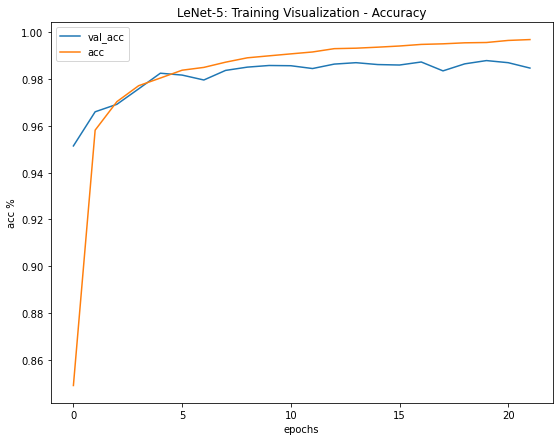

In [34]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.plot(history.history['accuracy'], label = 'acc')
plt.xlabel("epochs")
plt.ylabel("acc %")
plt.legend(loc = 'best')
plt.title("LeNet-5: Training Visualization - Accuracy")
plt.show()

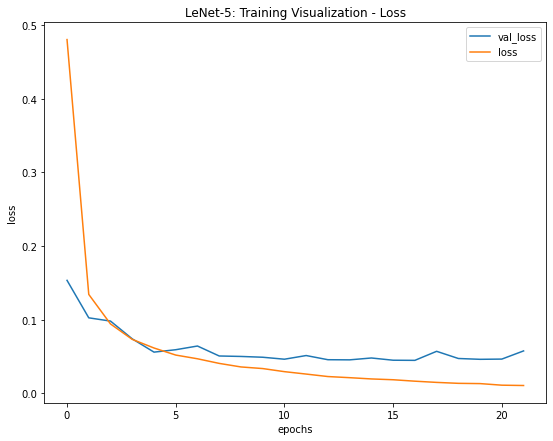

In [35]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc = 'best')
plt.title("LeNet-5: Training Visualization - Loss")
plt.show()

### Evaluate some test images using trained _LeNet-5_ CNN model

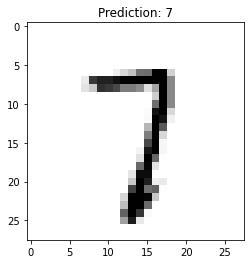

In [36]:
# Evaluating trained model-
# Make prediction using trained model-
prediction = model.predict(tf.reshape(X_test[234], shape = (1, 28, 28, 1)))
# number of examples, 28, 28, number of channels
prediction = prediction.argmax()

plt.imshow(tf.reshape(X_test[234], shape = (28, 28)), cmap = "Greys")
plt.title(f"Prediction: {prediction}")
plt.show()

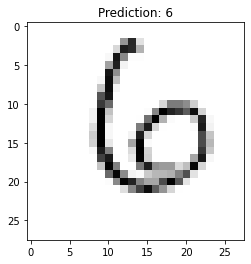

In [37]:
# Evaluating trained model-
# Make prediction using trained model-
prediction = model.predict(tf.reshape(X_test[100], shape = (1, 28, 28, 1)))
# number of examples, 28, 28, number of channels
prediction = prediction.argmax()

plt.imshow(tf.reshape(X_test[100], shape = (28, 28)), cmap = "Greys")
plt.title(f"Prediction: {prediction}")
plt.show()

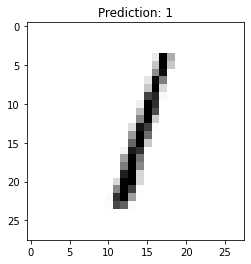

In [38]:
# Evaluating trained model-
# Make prediction using trained model-
prediction = model.predict(tf.reshape(X_test[2], shape = (1, 28, 28, 1)))
# number of examples, 28, 28, number of channels
prediction = prediction.argmax()

plt.imshow(tf.reshape(X_test[2], shape = (28, 28)), cmap = "Greys")
plt.title(f"Prediction: {prediction}")
plt.show()

In [39]:
# Evalutating trained model-
val_loss, val_acc = model.evaluate(X_test, y_test_ohe, verbose = 0)

In [40]:
print("Trained LeNet-5 CNN validation metrics: "
      f"loss = {val_loss:.4f} & accuracy = {val_acc * 100:.2f}%"
     )

Trained LeNet-5 CNN validation metrics: loss = 0.0449 & accuracy = 98.73%
